<a href="https://colab.research.google.com/github/Mael-zys/SD212/blob/main/lab5_hierarchy_yangsong.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SD212: Graph mining
## Lab 5: Hierarchical clustering

In this lab, you will learn to analyse the hierarchical structure of a graph. 

## Import

In [ ]:
!pip install scikit-network

In [ ]:
from IPython.display import SVG

In [ ]:
import numpy as np
from scipy import sparse

In [ ]:
from sknetwork.data import load_netset, karate_club
from sknetwork.hierarchy import LouvainHierarchy, BiLouvainHierarchy, Paris, BiParis, cut_straight
from sknetwork.ranking import PageRank, BiPageRank, top_k
from sknetwork.linalg import normalize
from sknetwork.utils import membership_matrix
from sknetwork.visualization import svg_graph, svg_digraph, svg_dendrogram

## Data

We will work on the following graphs (see the [NetSet](https://netset.telecom-paris.fr/) collection for details):
* Openflights (graph)
* WikiVitals (digraph)
* Cinema (bigraph)

In [ ]:
openflights = load_netset('openflights')
wikivitals = load_netset('wikivitals')
cinema = load_netset('cinema')

Unpacking archive...
Parsing files...
Done.
Unpacking archive...
Parsing files...
Done.
Unpacking archive...
Parsing files...
Done.


## 1. Graphs

## Karate Club


The [karate club graph](https://en.wikipedia.org/wiki/Zachary%27s_karate_club) provides ground-truth clusters.

In [ ]:
graph = karate_club(True)

In [ ]:
adjacency = graph.adjacency
position = graph.position
labels_true = graph.labels

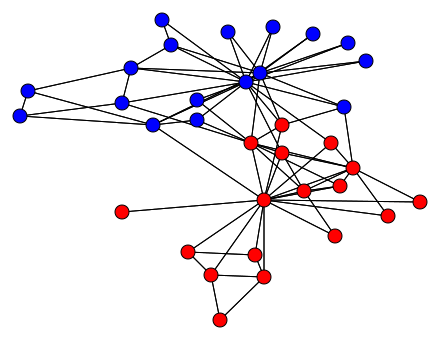

In [ ]:
image = svg_graph(adjacency, position, labels=labels_true)
SVG(image)

## To do

* Cluster the graph by the hierarchical Louvain algorithm.
* Display the dendrogram.
* How many clusters are there at depth 2?

In [ ]:
louvain = LouvainHierarchy()

In [ ]:
dendrogram = louvain.fit_transform(adjacency)

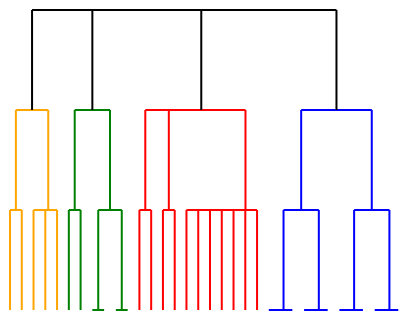

In [ ]:
image = svg_dendrogram(dendrogram)
SVG(image)

## To do

* Cluster the graph by the Paris algorithm.
* Display the dendrogram.
* Display the graph with the top-2 clusters. How many nodes are misclassified compared to the ground truth?
* Display the graph with the top-4 clusters and the corresponding aggregate dendrogram.

**Hint:** Check the parameters of the function ``cut_straight``.

In [ ]:
paris = Paris()

In [ ]:
dendrogram = paris.fit_transform(adjacency)

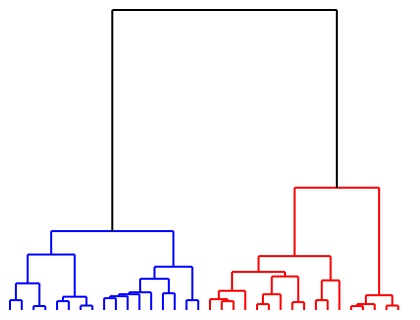

In [ ]:
image = svg_dendrogram(dendrogram)
SVG(image)

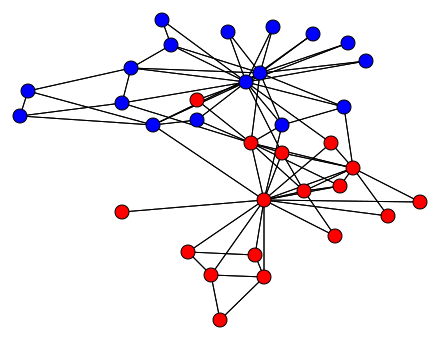

In [ ]:
clc = cut_straight(dendrogram,2)
np.sum((clc != labels_true))
image = svg_graph(adjacency, position, labels=clc)
SVG(image)

[12  9  8  5]


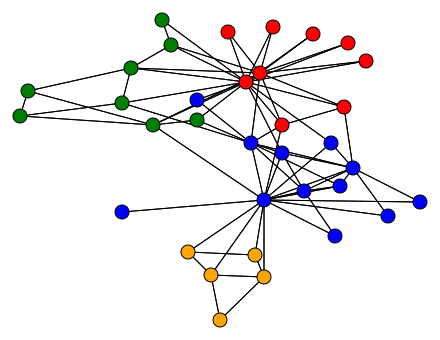

In [ ]:
clc, d = cut_straight(dendrogram,4, return_dendrogram=True)
_, counts = np.unique(clc, return_counts=True)
print(counts)
image = svg_graph(adjacency, position, labels=clc)
SVG(image)


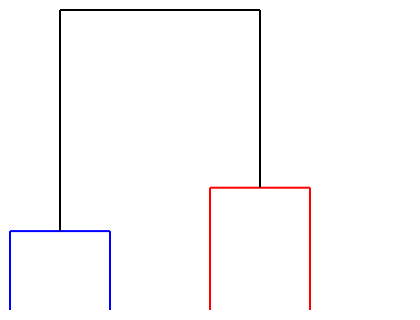

In [ ]:
image = svg_dendrogram(d)
SVG(image)

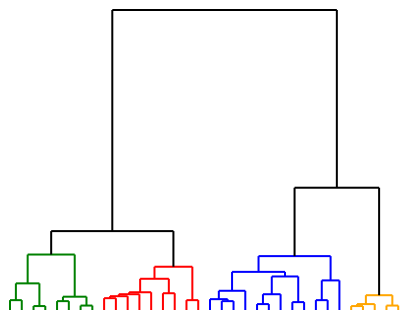

In [ ]:
image = svg_dendrogram(dendrogram, n_clusters=4)
SVG(image)

## Openflights


In [ ]:
graph = openflights

In [ ]:
adjacency = graph.adjacency
position = graph.position
names = graph.names

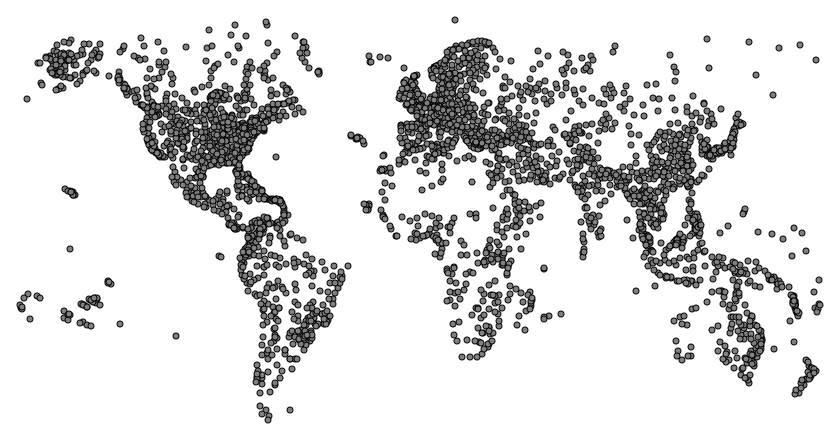

In [ ]:
image = svg_graph(adjacency, position, width=800, height=400, node_size=3, display_edges=False)
SVG(image)

## To do

* Display the same world map with the top-10 clusters found by Paris.
* Display the aggregate dendrogram formed by the top-50 clusters found by Paris, with the name of the top airport  (in traffic) of each cluster. <br>**Hint:** Use the parameters ``rotate``, ``n_clusters``, ``scale`` of ``svg_dendrogram`` for better visualization of the dendrogram.

In [ ]:
paris = Paris()

In [ ]:
dendrogram = paris.fit_transform(adjacency)

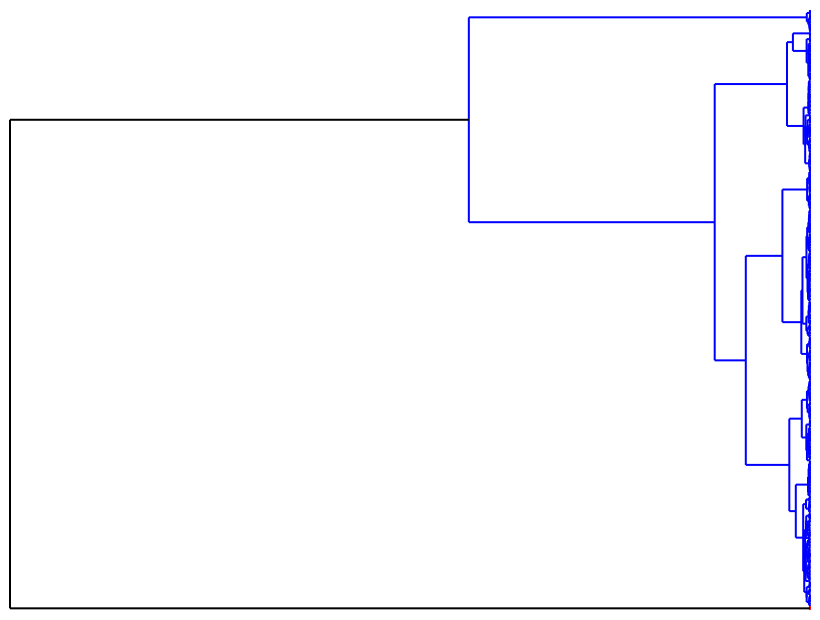

In [ ]:
image = svg_dendrogram(dendrogram, rotate=True, scale=2)
SVG(image)

In [ ]:
clc, d = cut_straight(dendrogram,10, return_dendrogram=True)
_, counts = np.unique(clc, return_counts=True)
print(counts)
image = svg_graph(adjacency, position, labels=clc)
SVG(image)


[881 567 470 415 223 199 182 114  25  21]


1615 Sydney Kingsford Smith International Airport
1986 Domodedovo International Airport
1618 Beijing Capital International Airport
1782 Hartsfield Jackson Atlanta International Airport
999 Dubai International Airport
1688 Los Angeles International Airport
1726 Miami International Airport
1171 Guarulhos - Governador André Franco Montoro International Airport
379 OR Tambo International Airport
1773 Dallas Fort Worth International Airport
124 Lester B. Pearson International Airport
1579 Kuala Lumpur International Airport
1833 Ted Stevens Anchorage International Airport
1295 Jorge Chávez International Airport
1857 Chicago O'Hare International Airport
238 Birmingham International Airport
1890 Suvarnabhumi Airport
1914 Incheon International Airport
487 Mohammed V International Airport
112 Calgary International Airport
623 Paris-Orly Airport
97 Winnipeg / James Armstrong Richardson International Airport
313 Oslo Gardermoen Airport
286 Dublin Airport
982 Mehrabad International Airport
762 Atat

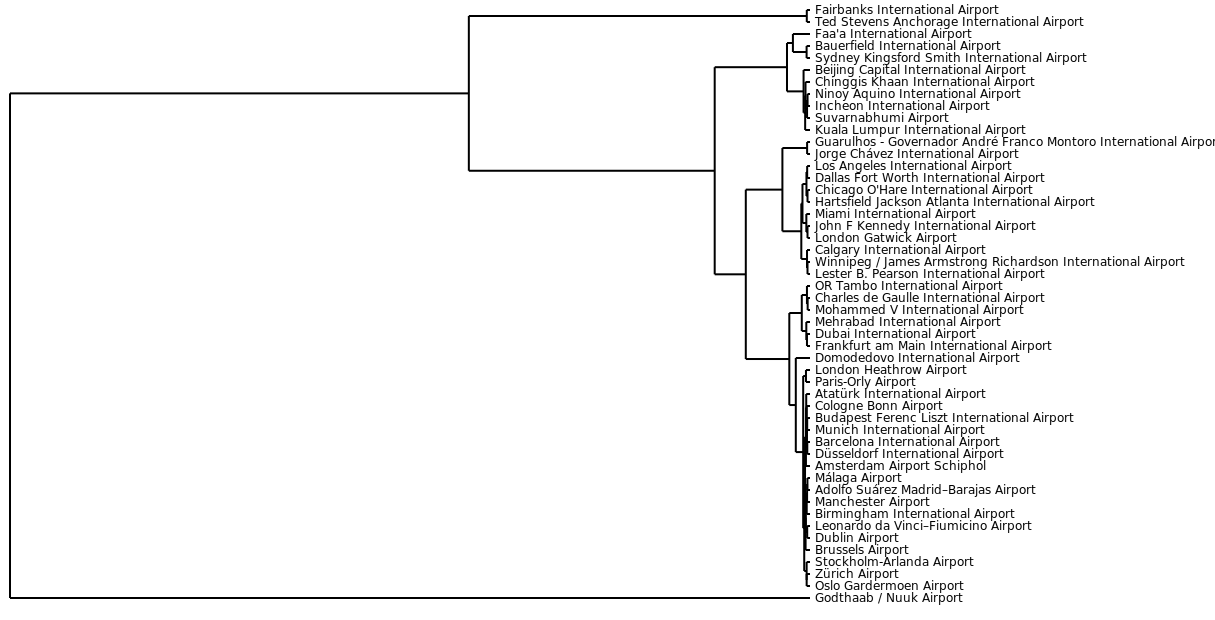

In [ ]:
clc, d = cut_straight(dendrogram,50, return_dendrogram=True)
c = np.unique(clc)
names_aggregate = []
for i in c:
  ind = np.argmax((adjacency @ np.ones(adjacency.shape[0])) * (clc == i))
  print(ind, names[int(ind)])
  names_aggregate.append(names[int(ind)])
image = svg_dendrogram(d, rotate=True, n_clusters=50, scale=2, names=names_aggregate)
SVG(image)

## 2. Directed graphs

## Wikipedia Vitals

In [ ]:
graph = wikivitals

In [ ]:
adjacency = graph.adjacency
names = graph.names

## To do

* Cluster the graph by the Paris algorithm.
* Give the size and top-5 articles of each of the top-25 clusters found by Paris.
* Display the aggregate dendrogram formed by the top-25 clusters, with the name of the top article of each cluster.

**Hint:** Use Personalized PageRank to get the top nodes of a cluster.

In [ ]:
paris = Paris()

In [ ]:
dendrogram = paris.fit_transform(adjacency)

In [ ]:
image = svg_dendrogram(dendrogram, rotate=True, scale=2)
SVG(image)

In [ ]:
clc, d = cut_straight(dendrogram,25, return_dendrogram=True)

In [ ]:
names_aggregate = []
c, counts = np.unique(clc, return_counts=True)
for j,i in enumerate(c):
  pagerank = PageRank()
  ind = np.where(clc == i)[0]
  scores = pagerank.fit_transform(adjacency, seeds = dict(zip(ind, 1/ind.shape[0]*np.ones(ind.shape[0]))))
  top_nodes = top_k(scores, 5)
  print("cluster "+str(i)+':')
  print('size = '+str(counts[j]))
  for j, node in enumerate(top_nodes):
    print(j + 1, names[node])
  names_aggregate.append(names[top_nodes[0]])

cluster 0:
size = 1210
1 Taxonomy (biology)
2 Animal
3 Bibliothèque nationale de France
4 United States
5 Latin
cluster 1:
size = 838
1 Bibliothèque nationale de France
2 Earth
3 Kelvin
4 Physics
5 Isaac Newton
cluster 2:
size = 660
1 Bibliothèque nationale de France
2 The New York Times
3 United States
4 Encyclopædia Britannica
5 France
cluster 3:
size = 606
1 Bibliothèque nationale de France
2 Geographic coordinate system
3 Russia
4 France
5 United States
cluster 4:
size = 601
1 Bibliothèque nationale de France
2 Mathematics
3 Real number
4 Function (mathematics)
5 Complex number
cluster 5:
size = 597
1 Bibliothèque nationale de France
2 United States
3 France
4 United Kingdom
5 Aristotle
cluster 6:
size = 564
1 Bibliothèque nationale de France
2 Latin
3 United States
4 Bacteria
5 The New York Times
cluster 7:
size = 494
1 Bibliothèque nationale de France
2 China
3 Geographic coordinate system
4 Japan
5 Chinese language
cluster 8:
size = 448
1 Bibliothèque nationale de France
2 Unite

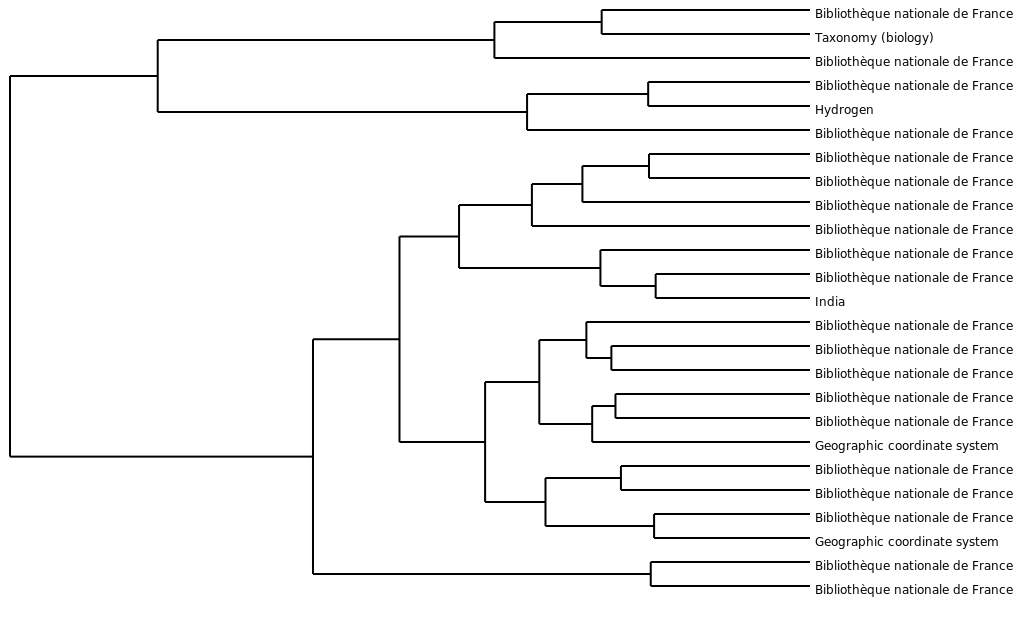

In [ ]:
image = svg_dendrogram(d, rotate=True, n_clusters=25, scale=2, names=names_aggregate)
SVG(image)

## To do

* Complete the following function that returns the nested clusters from a target node in a dendrogram.
* Give the size and top-5 articles of each nested cluster from the article **Riverboat**.

In [ ]:
def get_cluster_nested(dendrogram: np.ndarray, node: int): 
    '''Get nested clusters of a node.
    
    Parameters
    ----------
    dendrogram: 
        Dendrogram
    node:
        Target node
        
    Returns
    -------
    cluster_nested: list of list
        Nested clusters, expressed as a partition of the set of nodes (see the example below). 
        
    Example
    -------
    >>> dendrogram = np.array([[0, 1, 1, 2], [2, 3, 1, 2], [4, 5, 1, 4]])
    >>> get_cluster_nested(dendrogram, 0)
    [[0], [1], [2, 3]]
    '''
    n = dendrogram.shape[0] + 1
    
    cluster = {i: [i] for i in range(n)}
    cluster_nested = [[node]]
    cluster_index = node
    
    for t in range(n - 1):
        i = int(dendrogram[t][0])
        j = int(dendrogram[t][1])
        # to be completed
        

        if i == node:
          cluster_nested.append(cluster[j])
          node = n + t

        if j == node:
          cluster_nested.append(cluster[i])
          node = n + t

        cluster[n + t] = cluster.pop(i) + cluster.pop(j)
    return cluster_nested

In [ ]:
get_cluster_nested(np.array([[0, 1, 1, 2], [2, 3, 1, 2], [4, 5, 1, 4]]), 0)

[[0], [1], [2, 3]]

In [ ]:
node = 10000

In [ ]:
names[node]

'Riverboat'

In [ ]:
nested = get_cluster_nested(dendrogram, node)

In [ ]:
print(nested)

[[10000], [10006, 9997, 9999, 9929], [9993], [9995], [9990], [9994, 2331, 2329], [9987], [9794, 9756, 9796, 9998, 9789, 9790, 1129, 9795, 9792, 3985, 9250], [8018, 8242, 10002, 10003, 9793, 10001, 9791], [9932, 9945, 9615, 9747, 9930, 9943, 9937, 6618, 9946, 9631, 9941, 9948, 9626, 9630, 4320, 9629, 9617, 10005, 9485, 8324, 9486, 9614, 9973, 9484, 9613, 9632, 9446, 9611, 9620, 9624, 9668, 9621, 9627, 9622, 9623, 9609, 165, 9572, 9610, 9788, 9787, 9785, 9786, 9616, 9983, 9771, 9970, 9982, 9975, 9977, 4313, 9978, 9981, 9980, 9971, 9979, 6636, 3984, 3983, 8241, 8184, 9871, 2898, 9584, 4112, 9928, 9931, 9926, 4290, 9959, 9958, 9957, 9961, 9966, 9965, 9956, 9944, 9927, 9940, 10008, 10007, 9967, 9996, 9962, 9968, 9974, 9976, 9972, 9842], [6172, 9806, 9802, 9758, 9817, 9800, 9803, 9805, 9782, 9252, 9801, 9228, 9804, 9808, 9769, 9815, 9752, 9811, 9814, 9813, 9753, 9253, 5936, 9810, 9251, 4006, 9227, 9262, 9243, 9249, 9816, 9263, 9270, 9259, 8394, 9257, 6381, 9269, 9275, 9754, 9272, 9260, 9247,

In [ ]:
for i in nested:
  print(len(i))

1
4
1
1
1
3
1
11
7
89
69
448
59
1055
1210
2266
1060
3726


In [ ]:
len(nested)

18

In [ ]:
for j,i in enumerate(nested):
  pagerank = PageRank()
  scores = pagerank.fit_transform(adjacency, seeds = dict(zip(i, np.ones(len(i)))))
  print("cluster "+str(j)+':')
  print('size = '+str(len(i)))
  top_nodes = top_k(scores, min(5, len(i)))
  for j, node in enumerate(top_nodes):
    print(j + 1, names[node])


cluster 0:
size = 1
1 Riverboat
cluster 1:
size = 4
1 Tanker (ship)
2 Passenger ship
3 Merchant ship
4 Freight transport
cluster 2:
size = 1
1 Cargo ship
cluster 3:
size = 1
1 Fishing vessel
cluster 4:
size = 1
1 Barge
cluster 5:
size = 3
1 Bass Strait
2 Ferry
3 Murray River
cluster 6:
size = 1
1 Ship
cluster 7:
size = 11
1 Submarine
2 Aircraft carrier
3 Warship
4 Torpedo
5 Battleship
cluster 8:
size = 7
1 Sail
2 Sailing ship
3 Sailing
4 Lift (force)
5 Ship of the line
cluster 9:
size = 89
1 Bibliothèque nationale de France
2 Internal combustion engine
3 Diesel engine
4 Jet engine
5 Aircraft
cluster 10:
size = 69
1 Artillery
2 Cavalry
3 Infantry
4 Trench warfare
5 Bibliothèque nationale de France
cluster 11:
size = 448
1 Bibliothèque nationale de France
2 United States
3 World War II
4 The New York Times
5 Geographic coordinate system
cluster 12:
size = 59
1 Geographic coordinate system
2 Bibliothèque nationale de France
3 Harvard University
4 University of California, Berkeley
5 Educa

## 3. Bipartite graphs

## Cinema

In [ ]:
graph = cinema

In [ ]:
biadjacency = graph.biadjacency
movies = graph.names_row
actors = graph.names_col

## To do

* Get the hierarchy of actors and the hierarchy of movies by the Paris algorithm. 
* Give the size and top-3 movies of each of the top-20 clusters of movies.
* Give the size and top-3 actors of each of the top-20 clusters of actors.
* Give the size and top-3 actors of each nested cluster of **Catherine Deneuve**. 

**Hint:** Use Personalized BiPageRank to get the top nodes of a cluster.

In [ ]:
biparis = BiParis()

In [ ]:
biparis.fit(biadjacency)

BiParis(weights='degree', reorder=True)

In [ ]:
deneuve = 2173

In [ ]:
actors[deneuve]

'Catherine Deneuve'

In [ ]:
dendrogram_movies = biparis.dendrogram_row_
dendrogram_actors = biparis.dendrogram_col_

In [ ]:
clc, d = cut_straight(dendrogram_movies,20, return_dendrogram=True)

In [ ]:

c, counts = np.unique(clc, return_counts=True)
for j,i in enumerate(c):
  pagerank = BiPageRank()
  ind = np.where(clc == i)[0]
  scores = pagerank.fit_transform(biadjacency, seeds_row = dict(zip(ind, np.ones(counts[j]))))
  top_nodes = top_k(pagerank.scores_row_, 3)
  print("cluster "+str(i)+':')
  print('size = '+str(counts[j]))
  for j, node in enumerate(top_nodes):
    print(j + 1, movies[node])


cluster 0:
size = 23926
1 The Walking Dead (TV series)
2 House of Cards (U.S. TV series)
3 Arrow (TV series)
cluster 1:
size = 22042
1 Paramount on Parade
2 Ziegfeld Follies
3 The Hollywood Revue of 1929
cluster 2:
size = 11027
1 Suyamvaram
2 Kerala Cafe
3 Paalayam
cluster 3:
size = 10353
1 Many Kisses Later
2 Kaamelott
3 Un village français
cluster 4:
size = 7007
1 Mahabharat (2016 film)
2 Rajkahini
3 Immaan Dharam
cluster 5:
size = 4986
1 The Banquet (1991 film)
2 Lucky Stars
3 Seven Samurai
cluster 6:
size = 3553
1 Tatort
2 The Kingdom (miniseries)
3 Samson & Sally
cluster 7:
size = 2599
1 La gran familia
2 Las chicas del cable
3 Hasta que el dinero nos separe
cluster 8:
size = 592
1 24/7 in Love
2 Gimik
3 Ang Tanging Ina
cluster 9:
size = 339
1 fr/Maktoub (série télévisée)
2 The BabyDoll Night
3 The Auntie from Chicago
cluster 10:
size = 332
1 After Porn Ends
2 Not Married with Children XXX
3 Anikka
cluster 11:
size = 292
1 Páginas da Vida
2 Esperança (telenovela)
3 Insensato Coraç

In [ ]:
nested = get_cluster_nested(dendrogram_actors, deneuve)

In [ ]:
actors[nested[1]]

array(['Michel Piccoli'], dtype='<U95')

In [ ]:
nested = get_cluster_nested(dendrogram_actors, deneuve)

for j,i in enumerate(nested):
  pagerank = BiPageRank()
  scores = pagerank.fit_transform(biadjacency, seeds_col = dict(zip(i, np.ones(len(i)))))
  print("cluster "+str(j)+':')
  print('size = '+str(len(i)))
  top_nodes = top_k(pagerank.scores_col_, min(3, len(i)))
  for j, node in enumerate(top_nodes):
    print(j + 1, actors[node])

cluster 0:
size = 1
1 Catherine Deneuve
cluster 1:
size = 1
1 Michel Piccoli
cluster 2:
size = 5
1 François Sagat
2 Chiara Mastroianni
3 Jeremy Jordan (singer)
cluster 3:
size = 12
1 Heinz Weiss
2 Hans Peter Hallwachs
3 Werner Herzog
cluster 4:
size = 25
1 Raffaëla Anderson
2 Anthony Delon
3 Karen Lancaume
cluster 5:
size = 16
1 Claire Nebout
2 Stéphane Rideau
3 Élodie Bouchez
cluster 6:
size = 613
1 Gérard Depardieu
2 Isabelle Huppert
3 Ingrid Chauvin
cluster 7:
size = 266
1 Claude Jade
2 Jean-Louis Trintignant
3 Catherine Jacob
cluster 8:
size = 222
1 Joséphine Jobert
2 Alban Lenoir
3 Marie Denarnaud
cluster 9:
size = 249
1 Rémy Girard
2 Moshe Ivgy
3 Luc Picard
cluster 10:
size = 2087
1 Louis de Funès
2 Totò
3 Alberto Sordi
cluster 11:
size = 1382
1 Willy Fritsch
2 Hans Albers
3 Paul Hörbiger
cluster 12:
size = 2594
1 Edvard Persson
2 Yevgeny Leonov
3 Mikael Persbrandt
cluster 13:
size = 1633
1 Sara García
2 Gaspar Henaine
3 Federico Luppi
cluster 14:
size = 25338
1 Moe Howard
2 Larr